## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [4]:
data = os.path.join(os.getcwd(), "datasets", "car_evaluation.csv")
df = pd.read_csv(data, header=None)

### Exploratory data analysis

In [5]:
# view dimensions of dataset

df.shape

(1728, 7)

###### View top 5 rows of dataset

In [6]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### View summary of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Frequency distribution of values in variables

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


#### Explore class variable

In [11]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

#### Missing values in variables

In [12]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

##### Declare feature vector and target variable

In [13]:
X = df.drop(['class'], axis=1)
y = df['class']

##### Split data into separate training and test set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1382, 6), (346, 6))

### Feature Engineering

In [16]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

#### Encode categorical variables

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


In [18]:
# import category encoders

import category_encoders as ce

In [19]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [21]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


#### Decision Tree Classifier with criterion gini index

In [22]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [23]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


##### Predict the Test set results with criterion gini index

In [24]:
y_pred_gini = clf_gini.predict(X_test)

#### Check accuracy score with criterion gini index

In [25]:
from sklearn.metrics import accuracy_score

print(f"Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini):.4f}")

Model accuracy score with criterion gini index: 0.8179


#### Check for overfitting and underfitting

In [27]:
# print the scores on training and test set

print(f"Training set score: {clf_gini.score(X_train, y_train):.4f}")

print(f"Test set score: {clf_gini.score(X_test, y_test):.4f}")

Training set score: 0.8025
Test set score: 0.8179


##### Decision Tree Classifier with criterion entropy

In [30]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Predict the Test set results with criterion entropy

In [31]:
y_pred_en = clf_en.predict(X_test)

#### Check accuracy score with criterion entropy

In [33]:
print(f"Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_en):.4f}")

Model accuracy score with criterion entropy: 0.8179


#### Compare the train-set and test-set accuracy

In [34]:
y_pred_train_en = clf_en.predict(X_train)

In [35]:
print(f"Training-set accuracy score: {accuracy_score(y_train, y_pred_train_en):.4f}")

Training-set accuracy score: 0.8025


#### Check for overfitting and underfitting

In [36]:
# print the scores on training and test set

print(f"Training set score: {clf_en.score(X_train, y_train):.4f}")

print(f"Test set score: {clf_en.score(X_test, y_test):.4f}")

Training set score: 0.8025
Test set score: 0.8179


In [37]:
# need to implement Grid search using Decsison trees

from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best accuracy score: 0.9261811332600847


In [40]:
# Print the results of training and testing  using best_model

# Predict on the test set using the best model

y_pred = best_model.predict(X_test)

# Evaluate the best model
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

train_accuracy = best_model.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.9421965317919075
Train Accuracy: 0.9327062228654125


### Confusion matrix

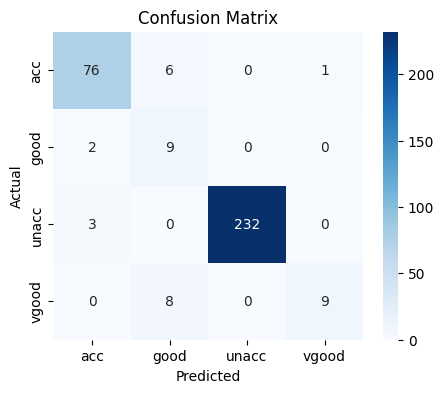

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         acc     0.9383    0.9157    0.9268        83
        good     0.3913    0.8182    0.5294        11
       unacc     1.0000    0.9872    0.9936       235
       vgood     0.9000    0.5294    0.6667        17

    accuracy                         0.9422       346
   macro avg     0.8074    0.8126    0.7791       346
weighted avg     0.9609    0.9422    0.9467       346

